In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/riyanandriyanto/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv('tbl_cnn.csv')
len(df)
df.head(10)

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage
0,610a281ce12961efb18c37ff,CNN Indonesia,Menteri Ketenagakerjaan (Menaker) Ida Fauziyah...,2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/202108041...,https://akcdn.detik.net.id/visual/2020/08/11/i...
1,610a281ce12961efb18c3800,CNN Indonesia,Anggota Komisi II DPR Fraksi Golkar Zulfikar A...,2021-08-04 12:22,tinggi-kematian-jateng-dalam-sebulan-sinyal-kr...,CNN Indonesia,pesawat presiden,"Tinggi Kematian Jateng dalam Sebulan, Sinyal K...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/p...
2,610a281ce12961efb18c3801,CNN Indonesia,"Harga Batu bara Acuan (HBA) menguat 13,55 pers...",2021-08-04 09:50,harga-batu-bara-acuan-tembus-us13099-per-ton-a...,CNN Indonesia,"batu bara, harga batu bara acuan","Harga Batu Bara Acuan Tembus US$130,99 per Ton...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2019/11/11/4...
3,610a281ce12961efb18c3802,CNN Indonesia,Capaian jumlah vaksinasi Covid-19 di Indonesia...,2021-08-04 12:06,china-tes-covid-massal-deteksi-kasus-tertinggi...,CNN Indonesia,"vaksin, vaksinasi, covid-19, virus corona, epi...","China Tes Covid Massal, Deteksi Kasus Tertingg...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/03/v...
4,610a281ce12961efb18c3803,BNPB,Badan Nasional Penanggulangan Bencana (BNPB) m...,2021-08-04 09:00,bnpb-kirim-masker-dan-tabung-oksigen-ke-papua-...,CNN Indonesia,"bnpb, ingat pesan ibu, papua barat, penanganan...",BNPB Kirim Masker dan Tabung Oksigen ke Papua ...,https://www.cnnindonesia.com/nasional/20210803...,https://akcdn.detik.net.id/visual/2021/07/29/k...
5,610a281ce12961efb18c3804,NaN,"Menteri Energi dan Sumber Daya Alam Malaysia, ...",2021-08-04 10:37,menteri-malaysia-mundur-imbas-kisruh-status-da...,CNN Indonesia,"malaysia, covid-19, muhyiddin yassin",Menteri Malaysia Mundur Imbas Kisruh Status Da...,https://www.cnnindonesia.com/internasional/202...,https://akcdn.detik.net.id/visual/2016/04/22/1...
6,610a281ce12961efb18c3805,CNN Indonesia,Harga jual emas PT Antam (Persero) Tbk berada ...,2021-08-04 09:05,harga-emas-antam-hari-ini-4-agustus-merosot-ke...,CNN Indonesia,"harga emas, emas, antam, logam mulia, komoditas","Harga Emas Antam Hari Ini 4 Agustus, Merosot k...",https://www.cnnindonesia.com/ekonomi/202108040...,https://akcdn.detik.net.id/visual/2018/11/12/7...
7,610a281ce12961efb18c3806,NaN,Keributan dan perang kata terjadi antara atlet...,2021-08-04 09:08,kostum-olimpiade-di-tong-sampah-atlet-meksiko-...,CNN Indonesia,"meksiko, olimpiade, olimpiade 2020, olimpiade ...","Kostum Olimpiade di Tong Sampah, Atlet Meksiko...",https://www.cnnindonesia.com/olahraga/20210804...,https://akcdn.detik.net.id/visual/2021/08/04/d...
8,610a281ce12961efb18c3807,CNN Indonesia,Pemerintah akan membenahi data vaksinasi Covid...,2021-08-04 08:58,nik-warga-bekasi-dipakai-wna-pemerintah-benahi...,CNN Indonesia,"warga bekasi nik ktp dipakai orang lain, vaksi...","NIK Warga Bekasi Dipakai WNA, Pemerintah Benah...",https://www.cnnindonesia.com/nasional/20210804...,https://akcdn.detik.net.id/visual/2021/08/02/t...
9,610a281ce12961efb18c3808,NaN,Musisi dan pentolan grup band Dewa 19 Ahmad Dh...,2021-08-04 07:15,cerita-ahmad-dhani-larikan-el-ke-rs-dan-sulit-...,CNN Indonesia,"ahmad dhani, selebriti, el rumi",Cerita Ahmad Dhani Larikan El ke RS dan Sulit ...,https://www.cnnindonesia.com/hiburan/202108040...,https://akcdn.detik.net.id/visual/2018/12/17/2...


In [3]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [4]:
len(df)

16792

In [5]:
len(df[df['content'].isnull()==True])

2773

In [6]:
pd.set_option('display.max_colwidth', None)
df[df['content'].isnull()==True]['content']

69       NaN
72       NaN
77       NaN
86       NaN
101      NaN
        ... 
16753    NaN
16757    NaN
16782    NaN
16788    NaN
16791    NaN
Name: content, Length: 2773, dtype: object

In [7]:
df = df.dropna(subset=['content'])
df = df.reset_index(drop=True)

In [8]:
df.isnull().sum()

_id               0
author         1172
content           0
publishedAt    8252
slug              0
source            0
tag               0
title             0
url               0
urlToImage       10
dtype: int64

In [9]:
def repair_exaggeration(x):
    word_tokens = word_tokenize(x)
    new_x =''
    for i in word_tokens:
        if (i =='psbb'):
            new = re.sub(r'(\w)\1\1+',r'\1\1',i)
            new_x = new_x +new+' '
        elif(i =='psb'):
            new = 'psbb'
            new_x = new_x +new+' '
        else:
            new = re.sub(r'(\w)\1\1\1+',r'\1',i)
            new_x = new_x +new+' '
    return new_x

def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

def clean_content(news):
    my_file = open("cleaning_source/combined_stop_words.txt", "r")
    news = my_file.read()
    stop_words = content.split("\n")
    file_2  = open("cleaning_source/update_combined_slang_words.txt", "r")
    content2 = file_2.read()
    slang_words = ast.literal_eval(content2)
    my_file.close()
    file_2.close()

    news = news.lower()
    news = re.sub(r':', '', news)
    news = re.sub(r'‚Ä¶', '', news)
    news = re.sub(r'[^\x00-\x7F]+',' ', news)
    news = re.sub('[^a-zA-Z]', ' ', news)
    news =re.sub("&lt;/?.*?&gt;","&lt;&gt;",news)
    news =re.sub("(\\d|\\W)+"," ",news)
    news = re.sub(r'â', '', news)
    news = re.sub(r'€', '', news)
    news = re.sub(r'¦', '', news)

    word_tokens = word_tokenize(news)
    for w in word_tokens:
        if w in slang_words.keys():
            word_tokens[word_tokens.index(w)] = slang_words[w]
    filtered_news = [w for w in word_tokens if not w in stop_words]
    filtered_news = []
    for w in word_tokens:
        if w not in stop_words and w not in string.punctuation:
            filtered_news.append(w.lower())
    return ' '.join(filtered_news)

def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

In [10]:
word_dict = {}
for i in range(0,len(df['content'])):
    sentence = df['content'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [11]:
len(word_dict)

76338

In [12]:
len({k:v for (k,v) in word_dict.items() if v < 4})

36288

In [13]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [14]:
len(lexicon)

10248

In [15]:
lexicon.head(10)

,word,weight,number_of_words
0,hai,3,1
1,merekam,2,1
2,ekstensif,3,1
3,paripurna,1,1
4,detail,2,1
5,pernik,3,1
6,belas,2,1
7,welas,4,1
8,kabung,1,1
9,rahayu,4,1


In [16]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [17]:
len(lexicon_word)

10248

In [18]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

61706

In [19]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

30035

In [20]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [21]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

, 269089
. 263854
di 82283
dan 80387
( 51905
) 51898
ini 39834
dengan 39281
untuk 38637
`` 38029
'' 37892
juga 22518
akan 21442
tidak 21212
Covid-19 20095
tersebut 19410
bisa 16945
kasus 16038
ke 15867
atau 14973


In [22]:
word_to_plot = df['content'].copy()

In [23]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

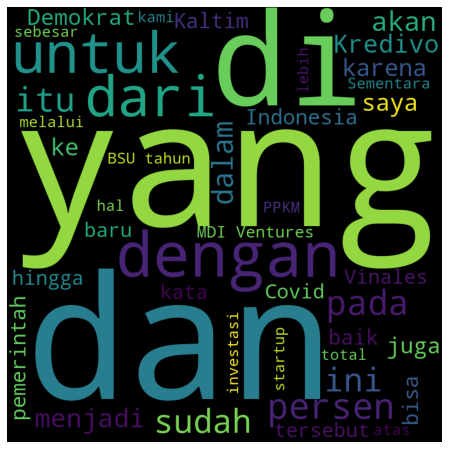

In [24]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

In [26]:
'pekerti' in word_dict

True

In [27]:
'budi baik' in lexicon_word

True

In [28]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['content'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [29]:
len(sentiment_list)

14019

In [30]:
print(senrow.shape[0])

14019


In [31]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [32]:
df_sen.head(10)

,papar,perbedaan,bantu,upah,langsung,tunai,pekerja,lalu,dapat,ungkap,...,durhaka,qadim,bujukan,afdal,ganteng,berseri,traktat,ilat,junjungan,sentiment
0,1,3,5,2,1,1,3,7,4,1,...,0,0,0,0,0,0,0,0,0,105
1,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,30
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,32
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,112
4,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-24
5,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,-99
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,53
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-141
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-29
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-46


Text(0.5, 0, 'sentiment')

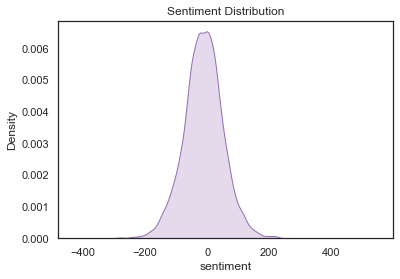

In [33]:
sns.set(style="white", palette="muted", color_codes=True)
sns.kdeplot(df_sen['sentiment'],color='m',shade=True)
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')

<AxesSubplot:xlabel='sentiment'>

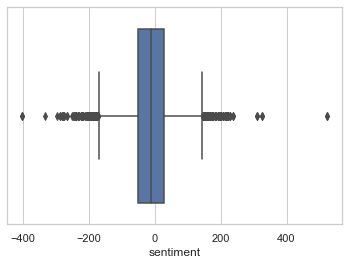

In [34]:
sns.set(style="whitegrid") 
sns.boxplot(x=df_sen['sentiment'])

In [35]:
df_sen.describe()

,papar,perbedaan,bantu,upah,langsung,tunai,pekerja,lalu,dapat,ungkap,...,durhaka,qadim,bujukan,afdal,ganteng,berseri,traktat,ilat,junjungan,sentiment
count,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,...,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000,14019.000000
mean,0.124189,0.024039,0.347600,0.030173,0.363863,0.050360,0.087667,0.614166,0.924174,0.147871,...,0.000285,0.000143,0.000143,0.000143,0.000285,0.000143,0.000285,0.000071,0.000143,-12.884443
std,0.459735,0.208073,1.283341,0.375471,0.719505,0.384131,0.550182,0.969282,1.519230,0.411046,...,0.020687,0.011944,0.011944,0.011944,0.023888,0.011944,0.023888,0.008446,0.016892,64.435762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-401.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-52.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
max,7.000000,7.000000,17.000000,13.000000,7.000000,13.000000,12.000000,9.000000,16.000000,5.000000,...,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,522.000000


In [36]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr
au = get_top_abs_correlations(df_sen, 15)

In [37]:
print('Perfect Correlation')
au[au==1]

Perfect Correlation


penghabisan  amah           1.0
kesel        gendut         1.0
getir        termasyhur     1.0
menyuapi     mainin         1.0
penghabisan  lagian         1.0
                           ... 
mengencang   getas          1.0
qadim        bujukan        1.0
bogem        terjengkang    1.0
watu         primbon        1.0
cangkul      primbon        1.0
Length: 86, dtype: float64

In [38]:
top10 = au[au<float(1)][0:10]
label = top10.index
label_list =[]
for i in label:
    for j in i:
        if(j not in label_list):
            label_list.append(j)
            
df_sen_corr = df_sen[label_list]
corr = df_sen_corr.corr()
for i in label_list:
    for j in label_list:
        if i!=j:
            corr[i][j] = round(corr[i][j],3)

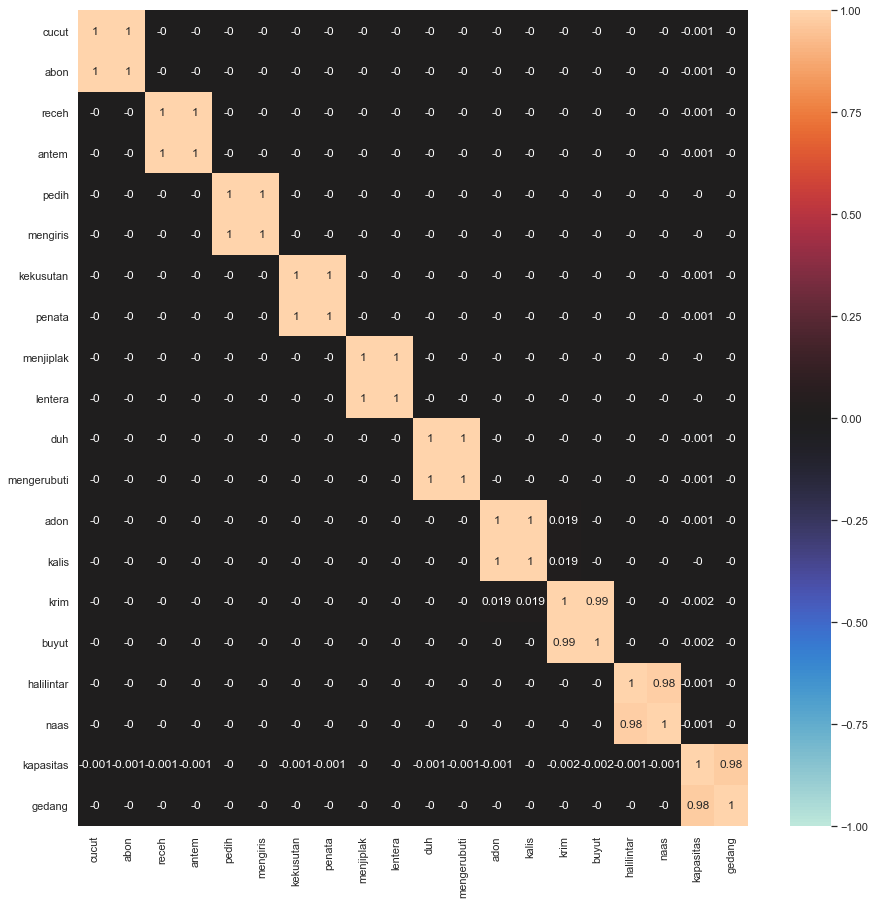

In [39]:
plt.figure(figsize=(15,15))

h = sns.heatmap(corr, annot=True,vmin=-1, vmax=1, center= 0)

plt.show()

In [40]:
top15_word = df_sen.drop(['sentiment'],axis=1).sum().sort_values(ascending=False)[0:15]

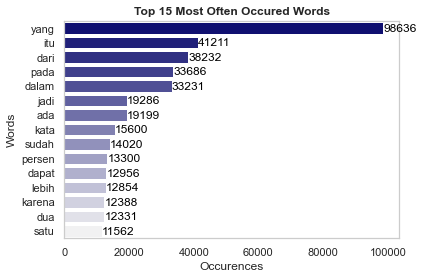

In [41]:
pal =sns.light_palette("navy", reverse=True,n_colors=15)
g = sns.barplot(y = top15_word.index , x = top15_word,palette=pal)
g.grid(False)
plt.xlabel('Occurences')
plt.ylabel('Words')
plt.title("Top 15 Most Often Occured Words",fontweight='bold') 
for i in range(15):
    g.text(top15_word[i],i+0.22, top15_word[i],color='black')
plt.show()

In [42]:
df['sentiment'] = df_sen['sentiment']

In [43]:
df.head(5)

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage,sentiment
0,610a281ce12961efb18c37ff,CNN Indonesia,"Menteri Ketenagakerjaan (Menaker) Ida Fauziyah memaparkan beberapa perbedaan antara skema bantuan subsidi upah (BSU) atau bantuan langsung tunai (BLT) pekerja untuk tahun ini dan tahun lalu. ""Setidaknya terdapat tiga perbedaan skema dengan BSU tahun lalu,"" ungkap Ida dalam keterangan resmi, Rabu (4/8). Pertama, kata Ida, perbedaan terletak pada aspek kriteria calon penerima BSU, khususnya pada batasan gaji wilayah, dan sektor pekerjaan yang terdampak. Untuk BSU tahun ini, buruh yang berhak mendapatkan bantuan harus mempunyai gaji paling banyak sebesar Rp3,5 juta. Namun, untuk buruh yang bekerja di wilayah dengan UMP atau UMK lebih besar dari Rp3,5 juta, maka persyaratan gaji tersebut menjadi paling banyak sebesar UMP atau UMK dibulatkan ke atas hingga ratus ribuan penuh. Sebagai contoh, UMP DKI Jakarta sebesar Rp4.416.185 dibulatkan menjadi Rp4.500.000. Lalu, dengan UMP di Kabupaten Karawang sebesar Rp4.798.312, sehingga dibulatkan menjadi Rp4.800.000. ""Adapun pada aspek batasan wilayah, pekerja yang berhak mendapatkan BSU, yaitu pekerja yang bekerja di wilayah PPKM Level 3 dan Level 4 yang ditetapkan pemerintah sebagaimana dalam Lampiran I Permenaker 16/2021,"" ucap Ida. Kemudian, BSU tahun ini diutamakan bagi buruh yang bekerja pada sektor industri barang konsumsi, transportasi, aneka industri, properti, dan real estate, perdagangan dan jasa, kecuali jasa pendidikan dan kesehatan. ""Tahun lalu, batasan gaji penerima BSU maksimal sebesar Rp5 juta dan tidak ada pembatasan wilayah maupun sektor,"" jelas Ida. Kedua, nilai BSU tahun ini sebesar Rp500 ribu per bulan untuk dua bulan. Pemerintah berencana menyalurkannya secara sekaligus sebesar Rp1 juta. Sementara, nilai bantuan tahun lalu mencapai Rp600 ribu per bulan selama empat bulan. Dengan demikian, total dana yang didapat penerima BSU tahun lalu lebih besar, yakni Rp2,4 juta. Ketiga, BSU tahun ini hanya akan disalurkan melalui empat bank Himbara, yakni BRI, BNI, BTN, dan Bank Mandiri. Sementara, penyaluran BSU tahun lalu bisa ke semua rekening bank. Aturan penyaluran BSU tahun ini tertuang dalam Peraturan Menteri Ketenagakerjaan (Permenaker) Nomor 16 Tahun 2021 tentang Perubahan Atas Permenaker Nomor 14 Tahun 2020 tentang Pedoman Pemberian Bantuan Pemerintah Berupa Subsidi Gaji atau Upah Bagi Pekerja atau Buruh dalam Penanganan Dampak Corona Virus Disease 2019 (Covid-19).",2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/20210804120812-532-676226/3-beda-blt-subsidi-gaji-2021-vs-2020,https://akcdn.detik.net.id/visual/2020/08/11/ilustrasi-uang-bantuan-dari-pemerintah-sebesar-600-ribu-rupiah-2_169.jpeg?w=650,105
1,610a281ce12961efb18c3800,CNN Indonesia,"Anggota Komisi II DPR Fraksi Golkar Zulfikar Arse Sadikin membela pemerintah terkait proyek pengecatan pesawat kepresidenan yang memakan biaya hingga Rp2 miliar. Menurut Zulfikar, hal tersebut tak perlu menjadi polemik, karena sudah menjadi bagian dari pekerjaan rutin dan pemeliharaan. Apalagi, jika anggaran yang dipakai tidak mengganggu anggaran penanganan Covid-19. ""Kalau itu bagian dari pekerjaan rutin, pemeliharaan berkala, sudah dianggarkan sesuai kondisi, dan dilakukan menurut jadwal atas pertimbangan teknis, serta tidak mengganggu alokasi anggaran yang lain, kenapa dipersoalkan dan diributkan?"" kata Zulfikar saat dihubungi, Rabu (4/8). Tidak hanya itu, menurut Zulfikar, pengubahan warna menjadi merah putih ini bertepatan dengan bulan peringatan kemerdekaan Indonesia. Menurut dia, hal itu semakin menegaskan bahwa pesawat itu memang benar-benar pesawat kepresidenan. ""Karena merah putih warna bendera negara dan presiden adalah kepala negara, sehingga sudah sangat pas bila cat pesawat kepresidenan berwarna merah putih,"" tuturnya. Sekretaris Fraksi PPP DPR RI, Achmad Baidowi juga mempertanyakan pihak

In [44]:
df.head()

,_id,author,content,publishedAt,slug,source,tag,title,url,urlToImage,sentiment
0,610a281ce12961efb18c37ff,CNN Indonesia,"Menteri Ketenagakerjaan (Menaker) Ida Fauziyah memaparkan beberapa perbedaan antara skema bantuan subsidi upah (BSU) atau bantuan langsung tunai (BLT) pekerja untuk tahun ini dan tahun lalu. ""Setidaknya terdapat tiga perbedaan skema dengan BSU tahun lalu,"" ungkap Ida dalam keterangan resmi, Rabu (4/8). Pertama, kata Ida, perbedaan terletak pada aspek kriteria calon penerima BSU, khususnya pada batasan gaji wilayah, dan sektor pekerjaan yang terdampak. Untuk BSU tahun ini, buruh yang berhak mendapatkan bantuan harus mempunyai gaji paling banyak sebesar Rp3,5 juta. Namun, untuk buruh yang bekerja di wilayah dengan UMP atau UMK lebih besar dari Rp3,5 juta, maka persyaratan gaji tersebut menjadi paling banyak sebesar UMP atau UMK dibulatkan ke atas hingga ratus ribuan penuh. Sebagai contoh, UMP DKI Jakarta sebesar Rp4.416.185 dibulatkan menjadi Rp4.500.000. Lalu, dengan UMP di Kabupaten Karawang sebesar Rp4.798.312, sehingga dibulatkan menjadi Rp4.800.000. ""Adapun pada aspek batasan wilayah, pekerja yang berhak mendapatkan BSU, yaitu pekerja yang bekerja di wilayah PPKM Level 3 dan Level 4 yang ditetapkan pemerintah sebagaimana dalam Lampiran I Permenaker 16/2021,"" ucap Ida. Kemudian, BSU tahun ini diutamakan bagi buruh yang bekerja pada sektor industri barang konsumsi, transportasi, aneka industri, properti, dan real estate, perdagangan dan jasa, kecuali jasa pendidikan dan kesehatan. ""Tahun lalu, batasan gaji penerima BSU maksimal sebesar Rp5 juta dan tidak ada pembatasan wilayah maupun sektor,"" jelas Ida. Kedua, nilai BSU tahun ini sebesar Rp500 ribu per bulan untuk dua bulan. Pemerintah berencana menyalurkannya secara sekaligus sebesar Rp1 juta. Sementara, nilai bantuan tahun lalu mencapai Rp600 ribu per bulan selama empat bulan. Dengan demikian, total dana yang didapat penerima BSU tahun lalu lebih besar, yakni Rp2,4 juta. Ketiga, BSU tahun ini hanya akan disalurkan melalui empat bank Himbara, yakni BRI, BNI, BTN, dan Bank Mandiri. Sementara, penyaluran BSU tahun lalu bisa ke semua rekening bank. Aturan penyaluran BSU tahun ini tertuang dalam Peraturan Menteri Ketenagakerjaan (Permenaker) Nomor 16 Tahun 2021 tentang Perubahan Atas Permenaker Nomor 14 Tahun 2020 tentang Pedoman Pemberian Bantuan Pemerintah Berupa Subsidi Gaji atau Upah Bagi Pekerja atau Buruh dalam Penanganan Dampak Corona Virus Disease 2019 (Covid-19).",2021-08-04 12:28,3-beda-blt-subsidi-gaji-2021-vs-2020,CNN Indonesia,"blt, bsu",3 Beda BLT Subsidi Gaji 2021 vs 2020,https://www.cnnindonesia.com/ekonomi/20210804120812-532-676226/3-beda-blt-subsidi-gaji-2021-vs-2020,https://akcdn.detik.net.id/visual/2020/08/11/ilustrasi-uang-bantuan-dari-pemerintah-sebesar-600-ribu-rupiah-2_169.jpeg?w=650,105
1,610a281ce12961efb18c3800,CNN Indonesia,"Anggota Komisi II DPR Fraksi Golkar Zulfikar Arse Sadikin membela pemerintah terkait proyek pengecatan pesawat kepresidenan yang memakan biaya hingga Rp2 miliar. Menurut Zulfikar, hal tersebut tak perlu menjadi polemik, karena sudah menjadi bagian dari pekerjaan rutin dan pemeliharaan. Apalagi, jika anggaran yang dipakai tidak mengganggu anggaran penanganan Covid-19. ""Kalau itu bagian dari pekerjaan rutin, pemeliharaan berkala, sudah dianggarkan sesuai kondisi, dan dilakukan menurut jadwal atas pertimbangan teknis, serta tidak mengganggu alokasi anggaran yang lain, kenapa dipersoalkan dan diributkan?"" kata Zulfikar saat dihubungi, Rabu (4/8). Tidak hanya itu, menurut Zulfikar, pengubahan warna menjadi merah putih ini bertepatan dengan bulan peringatan kemerdekaan Indonesia. Menurut dia, hal itu semakin menegaskan bahwa pesawat itu memang benar-benar pesawat kepresidenan. ""Karena merah putih warna bendera negara dan presiden adalah kepala negara, sehingga sudah sangat pas bila cat pesawat kepresidenan berwarna merah putih,"" tuturnya. Sekretaris Fraksi PPP DPR RI, Achmad Baidowi juga mempertanyakan pihak

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

tv = TfidfVectorizer(ngram_range=(1,3)) 
X = tv.fit_transform(df['content'])

Xtrain, Xtest, ytrain, ytest = train_test_split(X, df['sentiment'],
                                               test_size = 0.2, shuffle=True)

In [47]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(Xtrain,ytrain)
pred = svm.predict(Xtest)

print(accuracy_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

0.6979315263908702
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

        -401       0.00      0.00      0.00         1
        -287       1.00      1.00      1.00         1
        -242       0.00      0.00      0.00         1
        -239       0.00      0.00      0.00         1
        -238       0.00      0.00      0.00         1
        -229       0.00      0.00      0.00         1
        -223       0.00      0.00      0.00         1
        -220       1.00      1.00      1.00         2
        -210       0.00      0.00      0.00         1
        -207       0.00      0.00      0.00         1
        -206       1.00      1.00      1.00         1
        -205       0.00      0.00      0.00         2
        -203       1.00      1.00      1.00         1
        -201       0.00      0.00      0.00         1
        -200       1.00      1.00      1.00       

/Users/riyanandriyanto/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyanandriyanto/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/riyanandriyanto/.pyenv/versions/3.7.5/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [49]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()